In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("/content/medical_data.csv")

In [4]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
#What is the count of patients with respect to different diseases based on this data ?
#What is the count of Male and Female patients ?

In [6]:
conditions=['Hipertension','Diabetes','Alcoholism','Handcap']
conditions_count=data[conditions].sum()

In [8]:
print(conditions_count)

Hipertension    21801
Diabetes         7943
Alcoholism       3360
Handcap          2459
dtype: int64


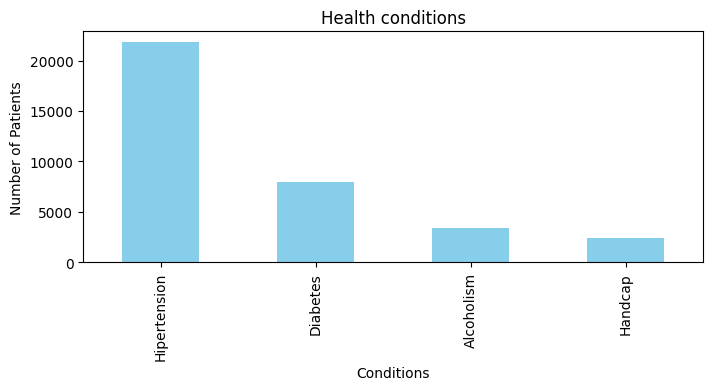

In [11]:
plt.figure(figsize=(8,3))
conditions_count.plot(kind='bar',color='skyblue')
plt.title("Health conditions")
plt.xlabel("Conditions")
plt.ylabel("Number of Patients")
plt.show()

In [13]:
#number of patients who actually visited the doctor (after appointment) ?
data['No-show'].value_counts()

,count
No-show,
No,88208
Yes,22319


In [14]:
data.isna().sum()

,0
PatientId,0
AppointmentID,0
Gender,0
ScheduledDay,0
AppointmentDay,0
Age,0
Neighbourhood,0
Scholarship,0
Hipertension,0
Diabetes,0


In [15]:
#inorder to convert categorical columns into numeric, we will use LabelEncoder
from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()

In [16]:
data['Gender']=label_encoder.fit_transform(data['Gender'])

In [17]:
data['Neighbourhood']=label_encoder.fit_transform(data['Neighbourhood'])

In [18]:
data['No-show']=label_encoder.fit_transform(data['No-show'])

In [19]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,39,0,1,0,0,0,0,0
1,5.589978e+14,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,39,0,0,0,0,0,0,0
2,4.262962e+12,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,45,0,0,0,0,0,0,0
3,8.679512e+11,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,54,0,0,0,0,0,0,0
4,8.841186e+12,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,39,0,1,1,0,0,0,0


In [20]:
x=data.drop(['No-show'],axis=1) #independent features
y=data['No-show'] #dependent features

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80) #80% of the data will be used for training

In [22]:
#using LogisticRegression Algorithm for Binary Classification
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [29]:
data['ScheduledDay'].dtype

dtype('O')

In [30]:
data['ScheduledDay']=pd.to_datetime(data['ScheduledDay'])

In [32]:
data['ScheduledDay'].head()

,ScheduledDay
0,2016-04-29 18:38:08+00:00
1,2016-04-29 16:08:27+00:00
2,2016-04-29 16:19:04+00:00
3,2016-04-29 17:29:31+00:00
4,2016-04-29 16:07:23+00:00


In [33]:
data['AppointmentDay']=pd.to_datetime(data['AppointmentDay'])

In [36]:
data['ScheduledDay']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  int64              
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  int64              
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

### Converting Date Columns to Numerical Features

To ensure our machine learning model can process the date and time information, we convert the `ScheduledDay` and `AppointmentDay` columns into a numerical format. We'll use Unix timestamps, which represent the number of seconds since January 1, 1970, UTC. This creates a continuous numerical feature from the date-time information.

**Important**: This conversion needs to happen *before* we define our independent features `x` and dependent feature `y`, and before performing the train-test split.

In [37]:
data['ScheduledDay_timestamp'] = data['ScheduledDay'].astype('int64') // 10**9
data['AppointmentDay_timestamp'] = data['AppointmentDay'].astype('int64') // 10**9

# Drop the original datetime columns as they are no longer needed
data = data.drop(columns=['ScheduledDay', 'AppointmentDay'])

display(data.head())

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDay_timestamp,AppointmentDay_timestamp
0,2.987250e+13,5642903,0,62,39,0,1,0,0,0,0,0,1461955088,1461888000
1,5.589978e+14,5642503,1,56,39,0,0,0,0,0,0,0,1461946107,1461888000
2,4.262962e+12,5642549,0,62,45,0,0,0,0,0,0,0,1461946744,1461888000
3,8.679512e+11,5642828,0,8,54,0,0,0,0,0,0,0,1461950971,1461888000
4,8.841186e+12,5642494,0,56,39,0,1,1,0,0,0,0,1461946043,1461888000


Now that the date columns are numerical, we can re-define our independent features `x` and dependent feature `y`, and then perform the train-test split again.

In [38]:
x=data.drop(['No-show'],axis=1) #independent features
y=data['No-show'] #dependent features

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80) #80% of the data will be used for training

# Re-initialize the Logistic Regression model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000) # Increased max_iter for convergence

In [39]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [40]:
predictions=model.predict(x_test)

In [41]:
#inorder to understand the overall accuracy of the model created, we use confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,predictions)
ac=accuracy_score(y_test,predictions)

In [42]:
print(cm)

[[17761     0]
 [ 4345     0]]


In [43]:
print(ac)

0.803447027956211
